Bilbao Cano Natalia

***Código:*** 40987

**Segundo Parcial - Tópicos Selectos en Inteligencia Artificial**

Procesamiento de Lenguaje Natural(NLP)

Análisis de sentimiento

Importamos las librerias necesarias para trabajar:
- numpy para vectores
- pandas para excel y csv
- seaborn y matplotlib para graficar los resultados
- sklearn para vectores, regresiones logisticas, datos del rendimiento del modelo y para dividir los modelos entre un set de entrenamiento y uno de prueba.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('BBDD.xlsx')

Mostramos las primeras columnas del dataset donde basicamente se puede observar un review en español de películas de usuarios y el sentimiento si es positivo o negativo.

In [ ]:
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [ ]:
df

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [ ]:
df = df[['sentimiento', 'review_es']].copy()

In [ ]:
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


Mostramos el histograma de como se comportan los sentimientos tanto positivos como negativos.

<Axes: >

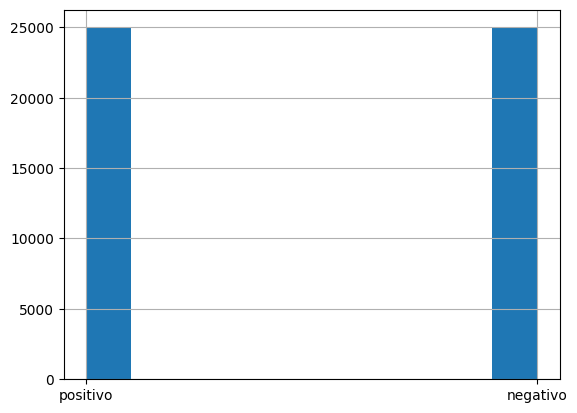

In [ ]:
df['sentimiento'].hist()

Le asignamos etiquetas a los sentimientos, cada vez que exista un sentimiento positivo va a ser un 1 y cada vez que exista un sentimiento negativo va a ser un 0, entonces el modelo lo que hara sera entregar un valor 1 cuando el comentario sea positivo y un 0 cuando el comentario sea negativo.

In [ ]:
target_map = {'positivo': 1, 'negativo': 0}
df['target'] = df['sentimiento'].map(target_map)

In [ ]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


Dividimos el dataframe en 2 conjuntos uno de entrenamineto y otro de prueba.

El dataframe de entrenamiento son los datos que usamos para entrenar el modelo y va a calcular los pesos para ser entrenado.

El dataframe de prueba nos va a servir para hacer la prueba el modelo que va a predecir si es 1 o 0 y se va a comparar con el valor real para saber si el modelo hizo una buena predicción o una mala.

In [ ]:
df_train, df_test = train_test_split(df)

In [ ]:
df_train

,sentimiento,review_es,target
3545,negativo,"Voy a muchas películas, a menudo llevo a mi hi...",0
23323,negativo,*** Este comentario puede contener spoilers **...,0
47806,negativo,Recuerdo que el perrito de diablo jugando en T...,0
2818,negativo,¿Sabes cómo a veces puedes ver una película de...,0
18970,negativo,Acabo de pasar la última media hora de leer la...,0
...,...,...,...
20532,positivo,Esta película esla única películaque cuentan c...,1
11006,negativo,Esta película parece enviar el mensaje equivoc...,0
33093,positivo,"Vi a esta película hace mucho tiempo, pero sie...",1
35158,negativo,Tengo que darle a esta película un 4 por un pa...,0


In [ ]:
df_test

,sentimiento,review_es,target
38518,negativo,Estoy fácilmente satisfecho.Me gustan las mala...,0
15106,negativo,Una de las películas primeras de Frances Farme...,0
49046,positivo,El actor PAXTON hizo su debut en su directoria...,1
41447,positivo,Andy McDermott (Tom Everett Scott) es un adole...,1
44243,positivo,"Muy divertido, bien hecho, bien hecho, bien ac...",1
...,...,...,...
6421,positivo,Este show realmente es el Idol Americano de Br...,1
1840,positivo,"Esta película fue la semana pasada y, aunque e...",1
29235,positivo,La heredera de la sociedad Susan Fletcher (Hop...,1
15905,negativo,La historia es un jersey marcado fuera de la r...,0


Vectorizamos el dataframe de entrenamiento y el de prueba, la vectorización tiene un máximo de 2000 dimensiones.

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)

In [ ]:
X_train = vectorizer.fit_transform(df_train['review_es'])

In [ ]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3471415 stored elements in Compressed Sparse Row format>

In [ ]:
X_test = vectorizer.transform(df_test['review_es'])
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1147752 stored elements in Compressed Sparse Row format>

In [ ]:
Y_train = df_train['target']
Y_test = df_test['target']

Usamos un modelo de regresión logística con un máximo de 1000 iteraciones, lo que hace es tomar pesos aleatorios, los va transformando y calcula el modelo entonces hace 1000 iteraciones y en cada una cambia los pesos para ver si la presión del modelo mejora o no, en el caso de que la presión no mejore va a seguir iterando hasta las 1000 iteraciones que es valor que colocamos anteriormente.

Podemos observar que el conjunto de entrenamiento casi el 88% de las veces predijo bien la clase, es decir, predijo bien si el comentario era positivo o negativo y el conjunto de prueba casi el 86% de las veces predijo bien la clase, es decir, predijo bien si el comentario era positivo o negativo.

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8788
Test acc: 0.86336


In [ ]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.8684435 , 0.1315565 ],
       [0.11083244, 0.88916756]])

Mostramos el cálculo de la matriz de confusión para el conjunto de entrenamiento y prueba donde podemos ver las clases (positivo y negativo), en el eje X se encunetra la predicción y en el eje Y el objetivo. Esto con el objetivo de mostrar que el modelo va bien.

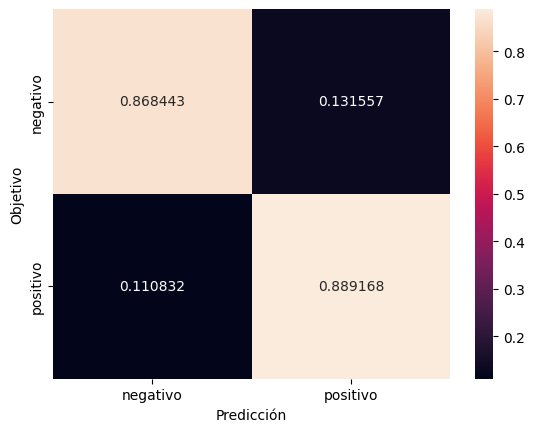

In [ ]:
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

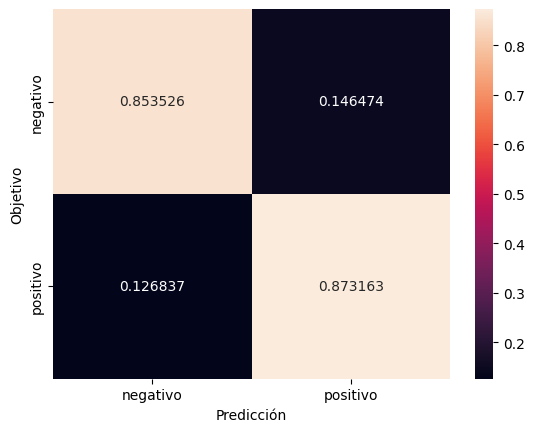

In [ ]:
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm)

Mostramos cómo se encuentran mapeadas las palabras.

In [ ]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'voy': 1953,
 'muchas': 1201,
 'películas': 1365,
 'menudo': 1151,
 'mi': 1155,
 'hijo': 884,
 'de': 437,
 'años': 167,
 'me': 1135,
 'que': 1513,
 'no': 1252,
 'lo': 1069,
 'haya': 863,
 'este': 677,
 'sin': 1683,
 'embargo': 576,
 'hay': 862,
 'referencias': 1552,
 'al': 66,
 'sexo': 1656,
 'una': 1872,
 'escena': 625,
 'es': 620,
 'la': 1025,
 'razón': 1532,
 'principal': 1459,
 'por': 1436,
 'él': 1992,
 'los': 1079,
 'llevan': 1066,
 'creer': 391,
 'comedia': 327,
 'prácticamente': 1492,
 'todos': 1822,
 'momentos': 1184,
 'divertidos': 528,
 'están': 690,
 'en': 582,
 'las': 1031,
 'ser': 1649,
 'interesante': 970,
 'divertido': 527,
 'cualquier': 406,
 'cosa': 384,
 'menos': 1147,
 'casi': 272,
 'medida': 1137,
 'trama': 1846,
 'historia': 889,
 'entiendo': 601,
 'perros': 1388,
 'pueden': 1501,
 'gran': 817,
 'compañía': 340,
 'se': 1620,
 'dice': 487,
 'toda': 1818,
 'un': 1871,
 'perro': 1387,
 'mal': 1101,
 'eran': 616,
 'suficientemente': 1733,
 'inteligentes': 962,
 'como

Tenemos un arreglo en donde toma cada una de las palabras y le asigna un coeficiente, mientras más negativo es más cercano a un comentario negativo y mientras más positivo es más cercano a un comentario positivo.

In [ ]:
model.coef_[0]

array([-0.52387319,  1.69943801,  0.58591583, ...,  0.10460509,
       -1.48110266, -2.11885647])

Calculamos el peso a las palabras y tomamos el valor 4 cómo corte, entonces se muestran todas palabras que tengan un peso mayor a 4. Mientras más positiva sea una palabra va ser más discriminada.

In [ ]:
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
excelente 7.934664754410957
hoy 4.4114882795756705
mejores 4.162765096876711
increíble 4.5563577767441705
definitivamente 4.096802028990905
perfecto 4.1600079395562855
encantó 4.976212800200728


In [ ]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
no -4.339201826903836
mal -5.80271247433202
peor -10.338434137713941
horrible -8.849766110260548
pobre -5.537262907984757
minutos -4.272086785564071
mala -7.371131891535154
aburrido -6.505530790087939
malo -4.4459907845697675
nada -4.063656475542033
basura -5.29639782997964
terrible -7.54800166471123
desafortunadamente -4.5866228145834365
aburrida -6.783734519229379
estúpida -4.171462539089139
peores -7.26571711522792
decepcionante -4.438440611606985
decepción -5.352059751856492


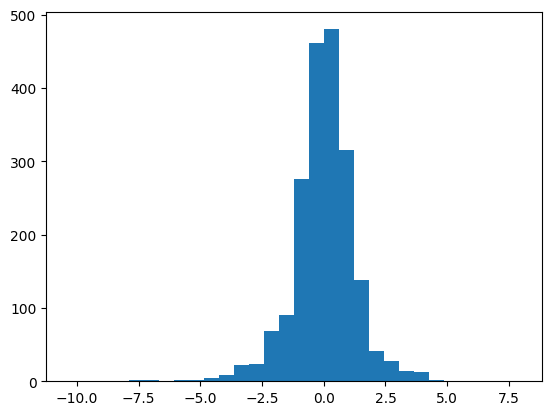

In [ ]:
plt.hist(model.coef_[0], bins=30);

In [ ]:
prueba = ["estuvo muy entretenida la película", "estuvo terrible la película, me aburrí mucho", "no la recomiendo", "la"]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)

In [ ]:
# Predecir con el modelo
P = model.predict(x)

In [ ]:
# Obtener las clases del modelo
clases = model.classes_

In [ ]:
# Mostrar la clase predicha
for i in range (len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'estuvo muy entretenida la película' es: Positivo
el Comentario: 'estuvo terrible la película, me aburrí mucho' es: Negativo
el Comentario: 'no la recomiendo' es: Positivo
el Comentario: 'la' es: Positivo


#Multiclases

Ahora realizamos el análisis de sentimiento para más de 2 clases

In [ ]:
df = pd.read_csv('Twitter_Data.csv')

In [ ]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo
...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo
162964,dear rss terrorist payal gawar what about modi...,Negativo
162965,did you cover her interaction forum where she ...,Neutro
162966,there big project came into india modi dream p...,Neutro


<Axes: >

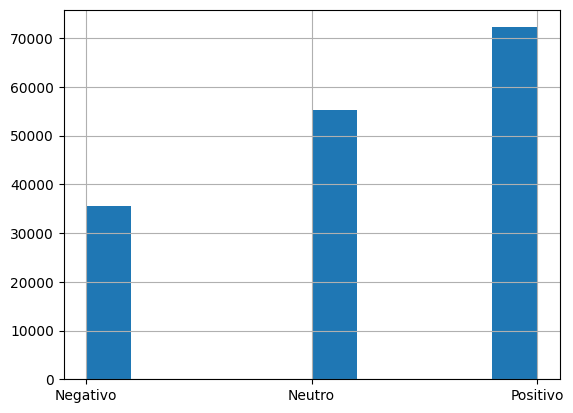

In [ ]:
df['category'].hist()

In [ ]:
target_map = {'Positivo': 1, 'Negativo': 0, 'Neutro': 2}
df['target'] = df['category'].map(target_map)

In [ ]:
df

,clean_text,category,target
0,when modi promised “minimum government maximum...,Negativo,0
1,talk all the nonsense and continue all the dra...,Neutro,2
2,what did just say vote for modi welcome bjp t...,Positivo,1
3,asking his supporters prefix chowkidar their n...,Positivo,1
4,answer who among these the most powerful world...,Positivo,1
...,...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo,0
162964,dear rss terrorist payal gawar what about modi...,Negativo,0
162965,did you cover her interaction forum where she ...,Neutro,2
162966,there big project came into india modi dream p...,Neutro,2


In [ ]:
df_train, df_test = train_test_split(df)

In [ ]:
df_train.head()

,clean_text,category,target
142469,bhai skin doctor daily travel uber and try get...,Positivo,1
127603,modi how shameless are you because you all are...,Negativo,0
145365,have seen and heard you and your team talking ...,Negativo,0
148951,have got christian michel sitting jail and rev...,Negativo,0
34927,yes but modi govt more focused economic develo...,Positivo,1


In [ ]:
df_train

,clean_text,category,target
142469,bhai skin doctor daily travel uber and try get...,Positivo,1
127603,modi how shameless are you because you all are...,Negativo,0
145365,have seen and heard you and your team talking ...,Negativo,0
148951,have got christian michel sitting jail and rev...,Negativo,0
34927,yes but modi govt more focused economic develo...,Positivo,1
...,...,...,...
129229,sirji add this your speeches that modi want in...,Neutro,2
78590,gazab like chokidar every bjps person call him...,Positivo,1
134480,think meant say krkl add from possible bjp onl...,Positivo,1
94019,your family have done this years before would ...,Positivo,1


In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_train

<122226x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1765468 stored elements in Compressed Sparse Row format>

In [ ]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<40742x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 587138 stored elements in Compressed Sparse Row format>

In [ ]:
Y_train = df_train['target']
Y_test = df_test['target']

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8969940929098555
Test acc: 0.8914633547690344


In [ ]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.75970619, 0.1201469 , 0.1201469 ],
       [0.03665115, 0.90262691, 0.06072194],
       [0.00804154, 0.01386139, 0.97809708]])

In [ ]:
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

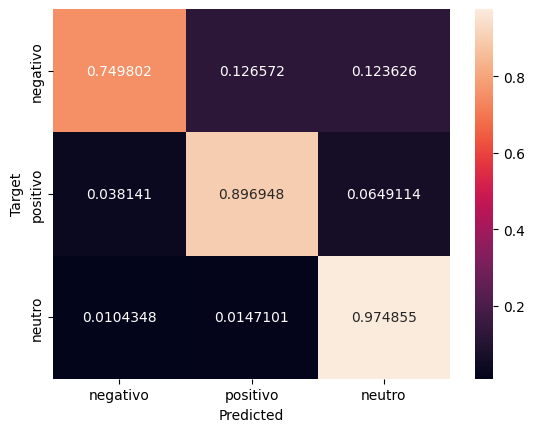

In [ ]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)